In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
df_train = pd.read_csv('../data/walmart_ts_6_fcst_grp_train.csv')
df_test = pd.read_csv('../data/walmart_ts_6_fcst_grp_test.csv')
print(df_train.shape, df_test.shape)
df_train.head()

(702, 11) (36, 11)


,Store,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,sample_weight
0,4,4,2010/2/5,59554.57,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
1,4,4,2010/2/12,54069.82,-1.0,-1.0,-1.0,-1.0,-1.0,1,5
2,4,4,2010/2/19,53939.17,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
3,4,4,2010/2/26,54687.08,-1.0,-1.0,-1.0,-1.0,-1.0,0,1
4,4,4,2010/3/5,56959.02,-1.0,-1.0,-1.0,-1.0,-1.0,0,1


In [3]:
# 単一のグループIDを作成
df_train['Store_Dept'] = [str(i)+'_'+str(j) for i,j in zip(df_train['Store'], df_train['Dept'])]
df_test['Store_Dept'] = [str(i)+'_'+str(j) for i,j in zip(df_test['Store'], df_test['Dept'])]

# 必要カラムの選択
df_train = df_train[['Store_Dept','Date','Weekly_Sales']]
df_test = df_test[['Store_Dept','Date','Weekly_Sales']]
print(df_train.shape, df_test.shape)
df_train.head()

(702, 3) (36, 3)


,Store_Dept,Date,Weekly_Sales
0,4_4,2010/2/5,59554.57
1,4_4,2010/2/12,54069.82
2,4_4,2010/2/19,53939.17
3,4_4,2010/2/26,54687.08
4,4_4,2010/3/5,56959.02


In [4]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df_train,
    id_column='Store_Dept',
    timestamp_column="Date"
)
train_data.head()

Weekly_Sales
item_id timestamp               
4_4     2010-02-05      59554.57
        2010-02-12      54069.82
        2010-02-19      53939.17
        2010-02-26      54687.08
        2010-03-05      56959.02

In [5]:
%%time

predictor = TimeSeriesPredictor(
    target="Weekly_Sales",
    eval_metric="RMSE",
    prediction_length=6).fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": {"model_path": "bolt_base", 
                    "fine_tune": True, 
                    "ag_args": {"name_suffix": "FineTuned"}},
    },
    time_limit=60,  # time limit in seconds
    enable_ensemble=False,
)

Beginning AutoGluon training... Time limit = 60s
AutoGluon will save models to '/Users/YShimada-MBP16/Documents/Code_Github/DL_for_ImageData_and_Finetuning/TimeSeries_WM_simple/code/AutogluonModels/ag-20250227_001640'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64
CPU Count:          16
GPU Count:          0
Memory Avail:       15.48 GB / 32.00 GB (48.4%)
Disk Space Avail:   1437.97 GB / 1863.39 GB (77.2%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': RMSE,
 'hyperparameters': {'Chronos': {'ag_args': {'name_suffix': 'FineTuned'},
                                 'fine_tune': True,
                                 'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 6,
 'quantile_levels': [

CPU times: user 5min 41s, sys: 23.7 s, total: 6min 5s
Wall time: 54.1 s


In [6]:
predictor.model_names()

['ChronosFineTuned[bolt_base]']

In [10]:
predictions = predictor.predict(train_data)
predictions

Model not specified in predict, will default to the model with the best validation score: ChronosFineTuned[bolt_base]


mean           0.1           0.2           0.3  \
item_id timestamp                                                            
4_4     2012-05-04  58595.316406  55092.570312  56189.984375  56994.613281   
        2012-05-11  59577.304688  55999.378906  57034.214844  57903.968750   
        2012-05-18  59984.527344  56305.207031  57434.007812  58328.488281   
        2012-05-25  60398.640625  56787.179688  57907.195312  58772.851562   
        2012-06-01  60917.472656  57115.027344  58315.117188  59229.449219   
        2012-06-08  60272.976562  56587.390625  57776.316406  58660.109375   
8_13    2012-05-04  24548.693359  23082.927734  23588.996094  23942.136719   
        2012-05-11  24518.984375  23006.482422  23516.433594  23890.783203   
        2012-05-18  24492.197266  22915.556641  23464.095703  23856.734375   
        2012-05-25  24589.574219  23006.396484  23566.089844  23960.103516   
        2012-06-01  24740.873047  23099.076172  23677.970703  24087.677734   
        2012-06-08  24607.287109  22978.689453  23567.267578  23973.035156   
1_13    2012-05-04  40775.109375  38478.839844  39301.722656  39837.445312   
        2012-05-11  41136.152344  38764.109375  39556.460938  40148.851562   
        2012-05-18  40134.589844  37762.593750  38604.125000  39198.457031   
        2012-05-25  40361.593750  37953.363281  38799.316406  39391.429688   
        2012-06-01  41843.531250  39109.558594  40061.503906  40721.656250   
        2012-06-08  42363.449219  39556.132812  40574.718750  41237.585938   
13_8    2012-05-04  35321.203125  33655.296875  34198.847656  34603.039062   
        2012-05-11  35151.710938  33439.460938  33983.292969  34409.445312   
        2012-05-18  34760.984375  32962.261719  33570.011719  34013.476562   
        2012-05-25  35150.953125  33257.765625  33883.660156  34344.675781   
        2012-06-01  35782.984375  33622.132812  34336.003906  34877.949219   
        2012-06-08  36854.238281  34333.898438  35219.660156  35842.761719   
19_8    2012-05-04  41912.250000  39819.847656  40510.464844  41009.988281   
        2012-05-11  41973.808594  39826.101562  40516.429688  41048.902344   
        2012-05-18  41744.882812  39560.644531  40287.625000  40826.605469   
        2012-05-25  41906.042969  39708.539062  40449.132812  40981.882812   
        2012-06-01  42043.632812  39729.136719  40515.105469  41082.992188   
        2012-06-08  42353.550781  39928.890625  40765.453125  41367.656250   
31_13   2012-05-04  42835.328125  40628.519531  41368.871094  41885.132812   
        2012-05-11  43960.285156  41489.937500  42250.796875  42864.503906   
        2012-05-18  46117.414062  43225.195312  44212.675781  44914.117188   
        2012-05-25  45344.375000  42789.960938  43648.585938  44264.628906   
        2012-06-01  44559.785156  42119.222656  42958.000000  43564.023438   
        2012-06-08  44479.445312  42019.847656  42891.765625  43503.992188   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
4_4     2012-05-04  57768.496094  58595.316406  59479.890625  60462.750000   
        2012-05-11  58725.652344  59577.304688  60489.054688  61479.675781   
        2012-05-18  59161.226562  59984.527344  60839.140625  61811.285156   
        2012-05-25  59595.992188  60398.640625  61252.738281  62228.347656   
        2012-06-01  60065.703125  60917.472656  61821.085938  62832.468750   
        2012-06-08  59438.492188  60272.976562  61165.996094  62170.792969   
8_13    2012-05-04  24248.982422  24548.693359  24862.019531  25214.398438   
        2012-05-11  24210.435547  24518.984375  24842.361328  25205.335938   
        2012-05-18  24189.925781  24492.197266  24805.035156  25160.130859   
        2012-05-25  24295.396484  24589.574219  24901.902344  25264.671875   
        2012-06-01  24419.216797  24740.873047  25060.521484  25430.720703   
        2012-06-08  24297.759766  24607.287109  2

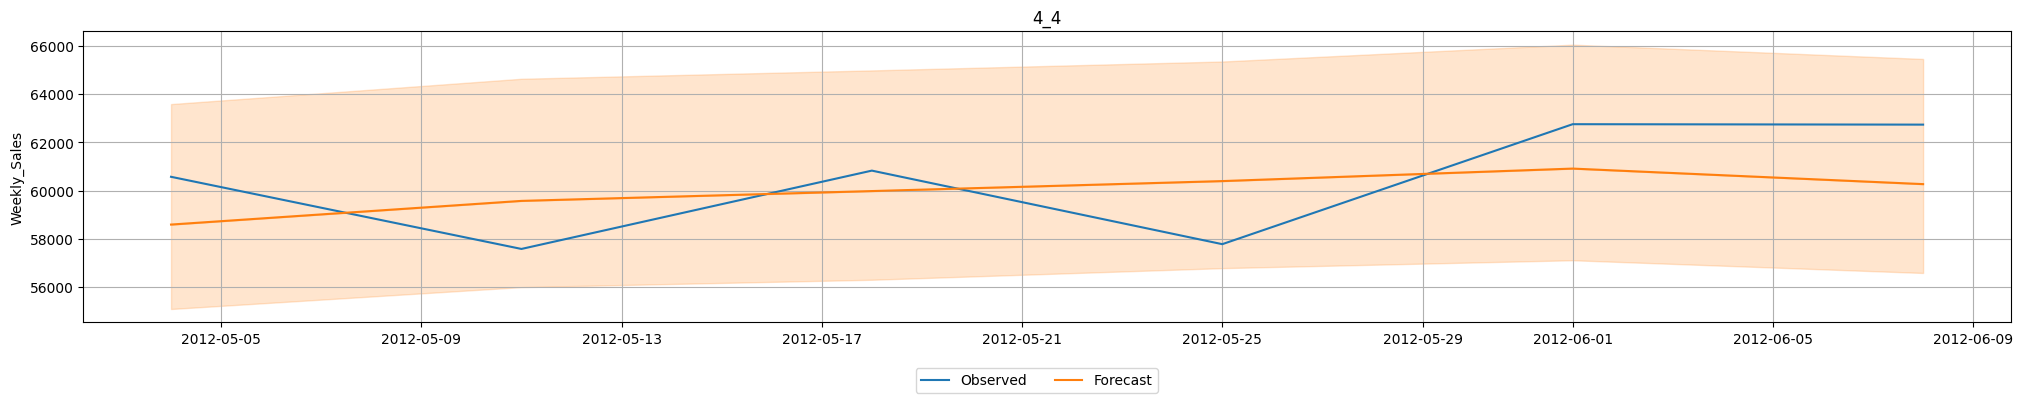

In [12]:
test_data = TimeSeriesDataFrame.from_data_frame(
    df_test,
    #id_column=['Store', 'Dept'],
    id_column='Store_Dept',
    timestamp_column="Date"
)

predictor.plot(test_data, predictions ,max_history_length=1000, item_ids=["4_4"])

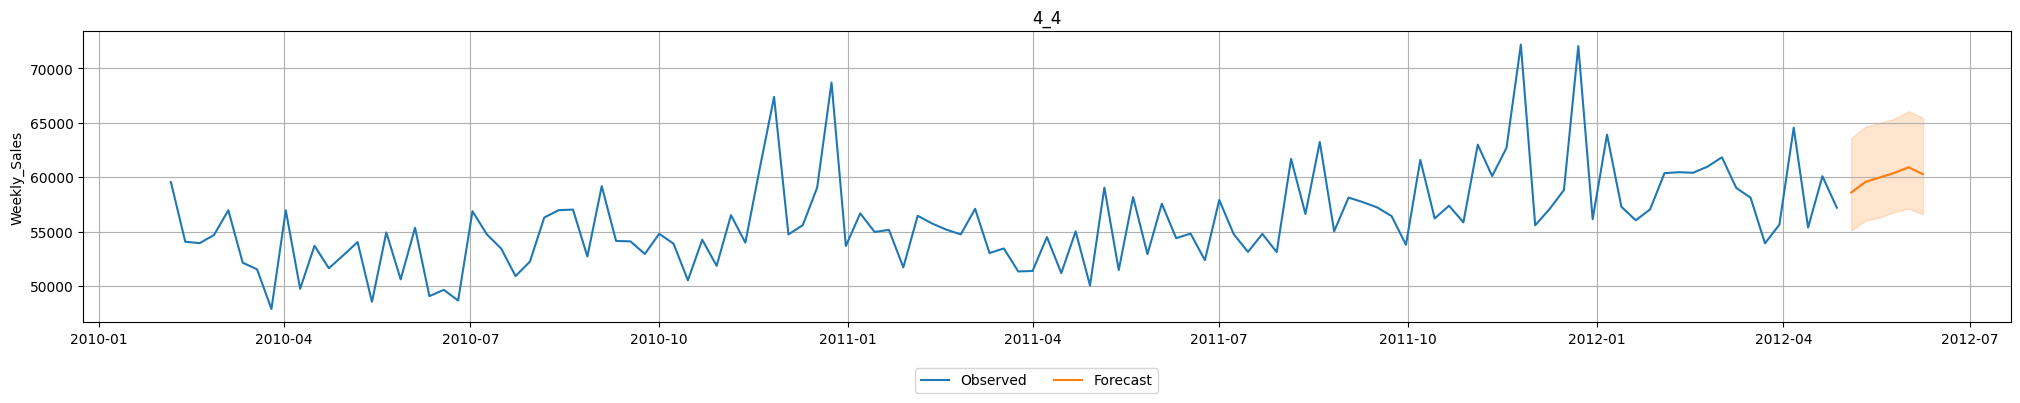

In [13]:
predictor.plot(train_data, predictions ,max_history_length=1000, item_ids=["4_4"])

In [8]:
%%time

predictor = TimeSeriesPredictor(
    target="Weekly_Sales",
    eval_metric="RMSE",
    prediction_length=6).fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},
            {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    time_limit=60,  # time limit in seconds
    enable_ensemble=False,
)

Beginning AutoGluon training... Time limit = 60s
AutoGluon will save models to '/Users/YShimada-MBP16/Documents/Code_Github/DL_for_ImageData_and_Finetuning/TimeSeries_WM_simple/code/AutogluonModels/ag-20250226_055808'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64
CPU Count:          16
GPU Count:          0
Memory Avail:       12.13 GB / 32.00 GB (37.9%)
Disk Space Avail:   1435.71 GB / 1863.39 GB (77.0%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': RMSE,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'fine_tune': True,
                       

CPU times: user 5min 32s, sys: 22.9 s, total: 5min 55s
Wall time: 50.3 s


In [13]:
predictor.leaderboard(train_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosFineTuned[bolt_small],-2357.315419,-2357.315419,0.645024,0.070518,48.925131,2
1,ChronosZeroShot[bolt_small],-2504.381832,-2504.381832,1.329352,1.169534,0.019410,1


In [17]:
predictor.model_names()

['ChronosZeroShot[bolt_small]', 'ChronosFineTuned[bolt_small]']

In [18]:
predictor.predict(train_data, model='ChronosFineTuned[bolt_small]')

mean           0.1           0.2           0.3  \
item_id timestamp                                                            
4_4     2012-05-04  59506.468750  56024.230469  57211.261719  58057.886719   
        2012-05-11  61524.140625  57720.351562  59000.187500  59905.933594   
        2012-05-18  60966.535156  57408.433594  58497.171875  59362.339844   
        2012-05-25  61417.296875  57640.730469  58820.929688  59779.031250   
        2012-06-01  62351.207031  58541.054688  59845.644531  60836.390625   
        2012-06-08  60714.062500  57297.976562  58373.996094  59241.316406   
8_13    2012-05-04  24256.177734  22778.589844  23315.312500  23669.603516   
        2012-05-11  24365.158203  22908.052734  23415.349609  23769.287109   
        2012-05-18  24279.566406  22782.501953  23298.343750  23681.056641   
        2012-05-25  24695.718750  23116.523438  23681.611328  24078.527344   
        2012-06-01  25156.855469  23526.730469  24143.750000  24549.642578   
        2012-06-08  24625.757812  23108.923828  23645.306641  24028.675781   
1_13    2012-05-04  40987.796875  38857.546875  39573.140625  40068.746094   
        2012-05-11  41657.128906  39444.000000  40207.347656  40731.972656   
        2012-05-18  40601.828125  38476.597656  39167.183594  39683.812500   
        2012-05-25  41218.285156  38686.570312  39527.082031  40168.312500   
        2012-06-01  43074.917969  40466.796875  41364.320312  42019.253906   
        2012-06-08  43434.203125  40545.683594  41505.148438  42213.769531   
13_8    2012-05-04  35494.457031  33757.695312  34390.656250  34806.007812   
        2012-05-11  35442.875000  33717.355469  34331.218750  34739.210938   
        2012-05-18  34710.359375  32995.394531  33630.238281  34057.554688   
        2012-05-25  35167.617188  33336.285156  34020.398438  34481.707031   
        2012-06-01  36439.023438  34481.031250  35232.773438  35725.546875   
        2012-06-08  37260.570312  34948.050781  35808.937500  36383.511719   
19_8    2012-05-04  42061.222656  39961.550781  40721.593750  41219.484375   
        2012-05-11  42453.355469  40356.839844  41096.667969  41588.082031   
        2012-05-18  42177.714844  39952.808594  40731.531250  41291.246094   
        2012-05-25  42088.339844  39622.144531  40514.550781  41141.000000   
        2012-06-01  41963.027344  39525.980469  40441.183594  41055.554688   
        2012-06-08  42290.609375  39728.472656  40640.824219  41299.402344   
31_13   2012-05-04  43773.734375  41485.894531  42299.281250  42848.167969   
        2012-05-11  44683.410156  42420.441406  43158.714844  43703.214844   
        2012-05-18  45818.531250  43524.820312  44206.847656  44775.886719   
        2012-05-25  46063.484375  43592.734375  44390.746094  45020.335938   
        2012-06-01  45492.117188  43139.855469  43931.695312  44548.828125   
        2012-06-08  45125.042969  42634.832031  43472.214844  44105.078125   

                             0.4           0.5           0.6           0.7  \
item_id timestamp                                                            
4_4     2012-05-04  58736.996094  59506.468750  60298.835938  61246.453125   
        2012-05-11  60696.343750  61524.140625  62307.507812  63229.078125   
        2012-05-18  60171.117188  60966.535156  61828.812500  62676.203125   
        2012-05-25  60654.816406  61417.296875  62161.929688  63039.476562   
        2012-06-01  61664.445312  62351.207031  63192.550781  64080.246094   
        2012-06-08  59989.328125  60714.062500  61449.472656  62301.820312   
8_13    2012-05-04  23958.550781  24256.177734  24581.265625  24951.632812   
        2012-05-11  24079.599609  24365.158203  24663.634766  25025.187500   
        2012-05-18  23993.716797  24279.566406  24586.660156  24933.824219   
        2012-05-25  24406.376953  24695.718750  24996.746094  25350.613281   
        2012-06-01  24880.019531  25156.855469  25490.443359  25862.074219   
        2012-06-08  24334.191406  24625.757812  2

In [14]:
test_data = TimeSeriesDataFrame.from_data_frame(
    df_test,
    id_column='Store_Dept',
    timestamp_column="Date"
)

predictor.leaderboard(test_data)

ValueError: Cannot reserve last prediction_length=6 time steps for evaluation in some time series in data. Please make sure that data includes both historic and future data, and thatall time series have length > prediction_length (at least 7)